<a href="https://colab.research.google.com/github/sappy04/BTECH-PROJECT-1/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Package Installation

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn catboost --quiet
!pip install torch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import sklearn
import catboost

print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)
print("Scikit-Learn:", sklearn.__version__)
print("CatBoost:", catboost.__version__)

Pandas: 2.2.2
NumPy: 2.0.2
Scikit-Learn: 1.6.1
CatBoost: 1.2.8


# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/heart.csv'
df = pd.read_csv(file_path)
print("Shape of dataset:", df.shape)
display(df.head())


Shape of dataset: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Preprocessing (Imputer + OneHot + Scaler Pipeline)

In [ ]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]
categorical_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]
print("Categorical Columns:", categorical_cols)
print("Numeric Columns:", numeric_cols)
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)
print("\nPreprocessing Pipeline Created Successfully.")


Categorical Columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numeric Columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

Preprocessing Pipeline Created Successfully.


# Data Anaylsis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

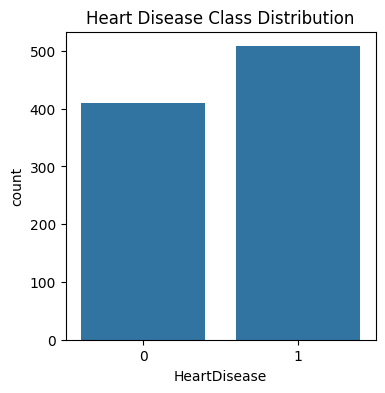

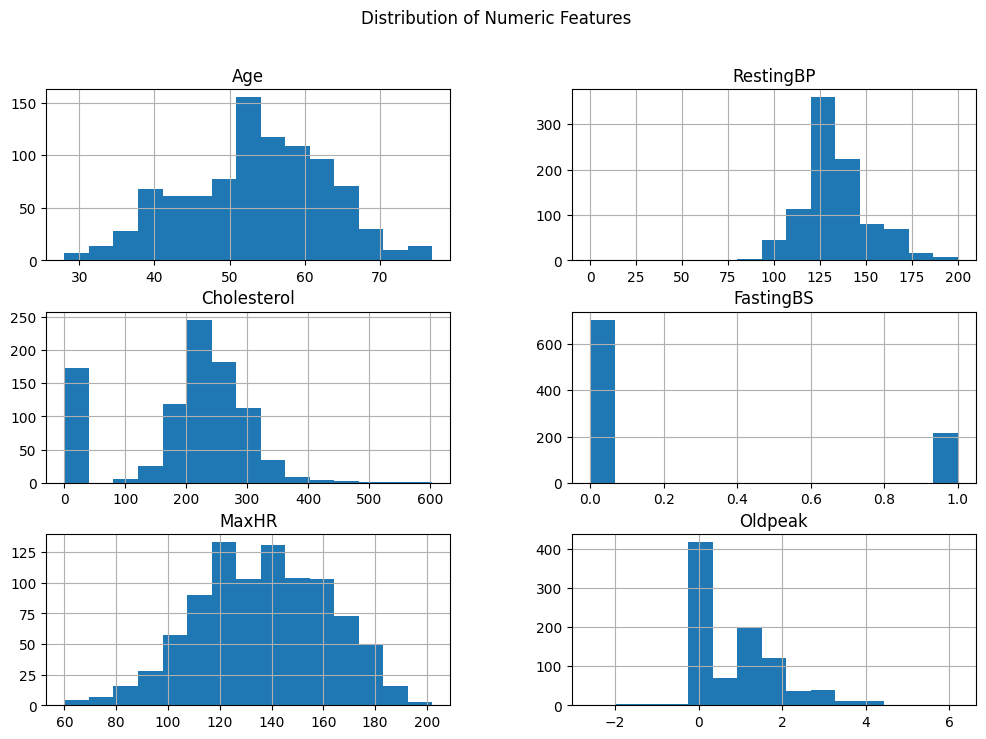

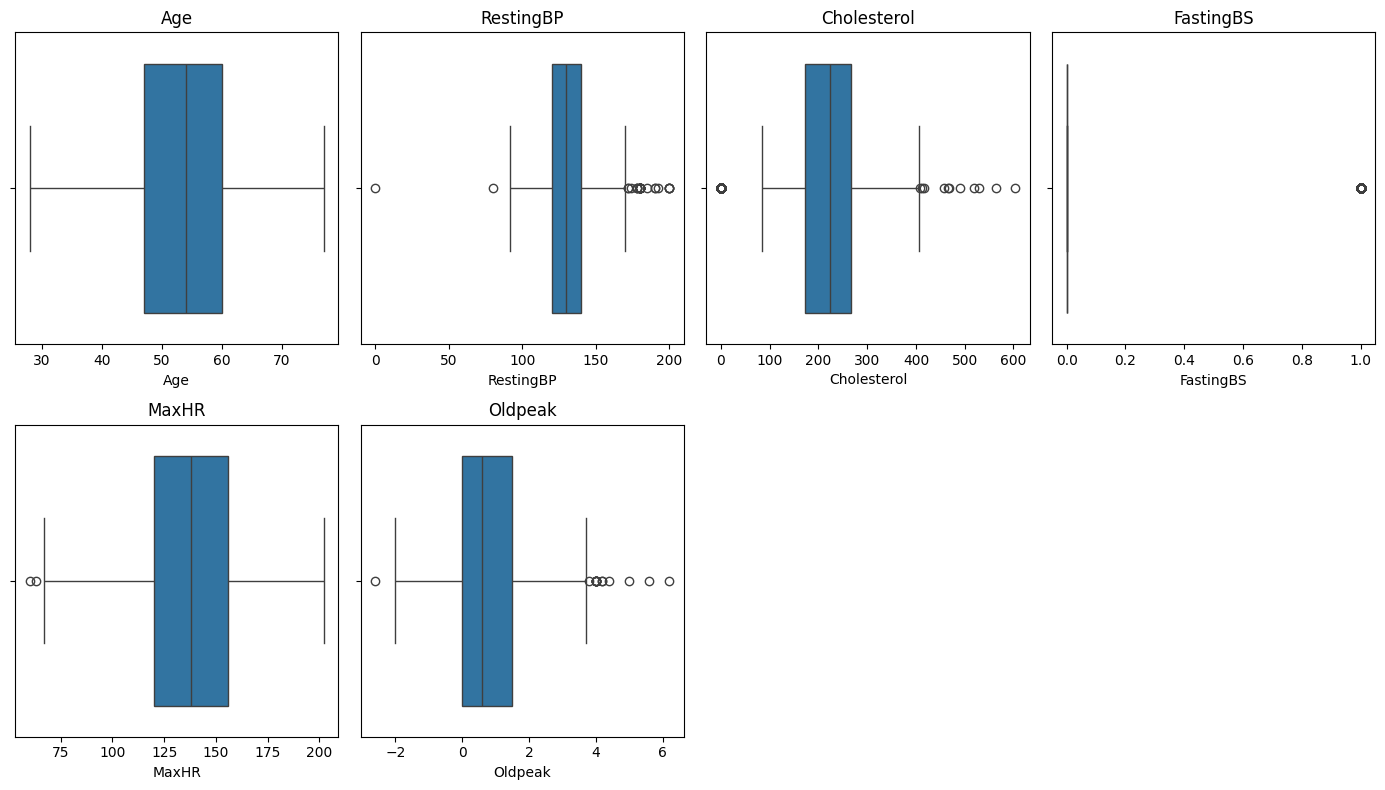

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df.info())
print(df.describe())
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='HeartDisease')
plt.title("Heart Disease Class Distribution")
plt.show()

df[numeric_cols].hist(figsize=(12, 8), bins=15)
plt.suptitle("Distribution of Numeric Features")
plt.show()


plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


# Train-Test

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, fbeta_score, roc_auc_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)

Train size: (734, 11)  Test size: (184, 11)


In [ ]:

baseline_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=200, solver='liblinear'))
])
baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)
y_prob = baseline_model.predict_proba(X_test)[:, 1]

In [ ]:
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)
auc = roc_auc_score(y_test, y_prob)

print("\n===== Baseline Model Performance (Centralized Logistic Regression) =====")
print(f"Accuracy:   {acc:.4f}")
print(f"Recall:     {recall:.4f}")
print(f"F1 Score:   {f1:.4f}")
print(f"F2 Score:   {f2:.4f}")
print(f"AUC:        {auc:.4f}")




===== Baseline Model Performance (Centralized Logistic Regression) =====
Accuracy:   0.8859
Recall:     0.9314
F1 Score:   0.9005
F2 Score:   0.9188
AUC:        0.9301


# Federated Data Partitioning + Local Training + FedAvg Aggregation.

Client 1 → Age < 45
Client 2 → 45 ≤ Age ≤ 60
Client 3 → Age > 60

In [ ]:
import numpy as np
from copy import deepcopy
NUM_CLIENTS = 3
SPLIT_STYLE = "non_iid_age"
ROUNDS = 5

def create_iid_clients(X, y, num_clients):
    """Even random partition (IID)."""
    data = pd.concat([X, y], axis=1).sample(frac=1, random_state=42).reset_index(drop=True)
    client_data = np.array_split(data, num_clients)
    return [(d.drop("HeartDisease", axis=1), d["HeartDisease"]) for d in client_data]


def create_non_iid_age_clients(X, y):
    """Non-IID partition based on Age groups."""
    data = pd.concat([X, y], axis=1)

    c1 = data[data["Age"] < 45]
    c2 = data[(data["Age"] >= 45) & (data["Age"] <= 60)]
    c3 = data[data["Age"] > 60]


    client_groups = [c1, c2, c3]
    client_groups = [cg.reset_index(drop=True) for cg in client_groups if len(cg) > 0]

    return [(cg.drop("HeartDisease", axis=1), cg["HeartDisease"]) for cg in client_groups]


if SPLIT_STYLE == "iid":
    clients = create_iid_clients(X_train, y_train, NUM_CLIENTS)
else:
    clients = create_non_iid_age_clients(X_train, y_train)

print(f"Number of clients: {len(clients)}")
for i, (Xi, yi) in enumerate(clients):
    print(f"Client {i+1}: {Xi.shape[0]} samples")




def train_local_model(X_local, y_local):
    """Train Logistic Regression on one client."""
    model = deepcopy(baseline_model)
    model.fit(X_local, y_local)
    return model



def fedavg(models, client_sizes):
    """Average model coefficients weighted by dataset size."""
    global_model = deepcopy(models[0])

    total_samples = sum(client_sizes)


    global_clf = global_model.named_steps["classifier"]
    clfs = [m.named_steps["classifier"] for m in models]


    coef = sum(clfs[i].coef_ * (client_sizes[i] / total_samples) for i in range(len(models)))
    intercept = sum(clfs[i].intercept_ * (client_sizes[i] / total_samples) for i in range(len(models)))

    global_clf.coef_ = coef
    global_clf.intercept_ = intercept

    return global_model

global_model = deepcopy(baseline_model)
age_non_iid_auc = 0.0 # Initialize variable

for current_round in range(ROUNDS):
    local_models = []
    client_sizes = []

    for (Xi, yi) in clients:
        local_model = train_local_model(Xi, yi)
        local_models.append(local_model)
        client_sizes.append(len(Xi))

    global_model = fedavg(local_models, client_sizes)


    y_prob = global_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    age_non_iid_auc = auc # Store the last AUC

    print(f"Round {current_round+1}/{ROUNDS} — Global Model AUC = {auc:.4f}")

print("\n Federated Training Completed.")

Number of clients: 3
Client 1: 138 samples
Client 2: 408 samples
Client 3: 188 samples
Round 1/5 — Global Model AUC = 0.9314
Round 2/5 — Global Model AUC = 0.9314
Round 3/5 — Global Model AUC = 0.9314
Round 4/5 — Global Model AUC = 0.9314
Round 5/5 — Global Model AUC = 0.9314

 Federated Training Completed.


# Calibration Set

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_score, recall_score, fbeta_score, roc_auc_score
X_train_sub, X_calib, y_train_sub, y_calib = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)
print("Calibration set size:", X_calib.shape)
global_model.fit(X_train_sub, y_train_sub)
calibrated_model = CalibratedClassifierCV(global_model.named_steps["classifier"], cv="prefit", method="sigmoid")
X_calib_processed = global_model.named_steps["preprocessor"].transform(X_calib)
calibrated_model.fit(X_calib_processed, y_calib)

print(" Calibration completed.")
X_test_processed = global_model.named_steps["preprocessor"].transform(X_test)
y_prob = calibrated_model.predict_proba(X_test_processed)[:, 1]
thresholds = np.arange(0.1, 0.91, 0.01)
best_threshold = 0
best_f2 = 0
for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    f2 = fbeta_score(y_test, y_pred_t, beta=2)
    if f2 > best_f2:
        best_f2 = f2
        best_threshold = t
y_pred_best = (y_prob >= best_threshold).astype(int)

final_recall = recall_score(y_test, y_pred_best)
final_f2 = fbeta_score(y_test, y_pred_best, beta=2)
final_auc = roc_auc_score(y_test, y_prob)

print("\n===== Threshold Optimization Results =====")
print(f"Optimal Threshold: {best_threshold:.2f}")
print(f"Recall:           {final_recall:.4f}")
print(f"F2 Score:         {final_f2:.4f}")
print(f"AUC:              {final_auc:.4f}")


Calibration set size: (147, 11)
 Calibration completed.


/usr/local/lib/python3.12/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(



===== Threshold Optimization Results =====
Optimal Threshold: 0.50
Recall:           0.9314
F2 Score:         0.9223
AUC:              0.9230


# Federated Training (IID) + Compare

In [ ]:
clients_iid = create_iid_clients(X_train, y_train, NUM_CLIENTS)

print("IID Clients:")
for i, (Xi, yi) in enumerate(clients_iid):
    print(f"Client {i+1}: {Xi.shape[0]} samples")



iid_global_model = deepcopy(baseline_model)

iid_auc_scores = []

for current_round in range(ROUNDS):
    local_models = []
    client_sizes = []

    for (Xi, yi) in clients_iid:
        local_model = train_local_model(Xi, yi)
        local_models.append(local_model)
        client_sizes.append(len(Xi))

    iid_global_model = fedavg(local_models, client_sizes)
    y_prob = iid_global_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    iid_auc_scores.append(auc)
    print(f"IID Round {current_round+1}/{ROUNDS} — AUC = {auc:.4f}")

print("\n IID Federated Training Completed.")


iid_final_auc = iid_auc_scores[-1]

IID Clients:
Client 1: 245 samples
Client 2: 245 samples
Client 3: 244 samples
IID Round 1/5 — AUC = 0.9283
IID Round 2/5 — AUC = 0.9283
IID Round 3/5 — AUC = 0.9283


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


IID Round 4/5 — AUC = 0.9283
IID Round 5/5 — AUC = 0.9283

 IID Federated Training Completed.


In [ ]:


def create_non_iid_gender_clients(X, y):
    data = pd.concat([X, y], axis=1)

    male = data[data["Sex"] == "M"]
    female = data[data["Sex"] == "F"]

    client_groups = [male, female]
    client_groups = [cg.reset_index(drop=True) for cg in client_groups if len(cg) > 0]

    return [(cg.drop("HeartDisease", axis=1), cg["HeartDisease"]) for cg in client_groups]

clients_gender = create_non_iid_gender_clients(X_train, y_train)

print("Gender-Based Clients:")
for i, (Xi, yi) in enumerate(clients_gender):
    print(f"Client {i+1} ({'Male' if i==0 else 'Female'}): {Xi.shape[0]} samples")



gender_global_model = deepcopy(baseline_model)

for round in range(ROUNDS):
    local_models = []
    client_sizes = []

    for (Xi, yi) in clients_gender:
        local_model = train_local_model(Xi, yi)
        local_models.append(local_model)
        client_sizes.append(len(Xi))

    gender_global_model = fedavg(local_models, client_sizes)

    y_prob = gender_global_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)

    print(f"Gender Split - Round {round+1}/{ROUNDS} — AUC = {auc:.4f}")

print("\n Federated Training (Gender Non-IID) Completed.")


Gender-Based Clients:
Client 1 (Male): 579 samples
Client 2 (Female): 155 samples
Gender Split - Round 1/5 — AUC = 0.9217
Gender Split - Round 2/5 — AUC = 0.9217
Gender Split - Round 3/5 — AUC = 0.9217
Gender Split - Round 4/5 — AUC = 0.9217
Gender Split - Round 5/5 — AUC = 0.9217

 Federated Training (Gender Non-IID) Completed.


In [ ]:


def create_non_iid_cpt_clients(X, y):
    data = pd.concat([X, y], axis=1)

    c1 = data[data["ChestPainType"] == "TA"]
    c2 = data[data["ChestPainType"] == "ATA"]
    c3 = data[data["ChestPainType"] == "NAP"]
    c4 = data[data["ChestPainType"] == "ASY"]

    client_groups = [c1, c2, c3, c4]
    client_groups = [cg.reset_index(drop=True) for cg in client_groups if len(cg) > 0]

    return [(cg.drop("HeartDisease", axis=1), cg["HeartDisease"]) for cg in client_groups]

clients_cpt = create_non_iid_cpt_clients(X_train, y_train)

print("Chest Pain Type Clients:")
for i, (Xi, yi) in enumerate(clients_cpt):
    print(f"Client {i+1}: {Xi.shape[0]} samples")



cpt_global_model = deepcopy(baseline_model)

for round in range(ROUNDS):
    local_models = []
    client_sizes = []

    for (Xi, yi) in clients_cpt:
        local_model = train_local_model(Xi, yi)
        local_models.append(local_model)
        client_sizes.append(len(Xi))

    cpt_global_model = fedavg(local_models, client_sizes)

    y_prob = cpt_global_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)

    print(f"CPT Split - Round {round+1}/{ROUNDS} — AUC = {auc:.4f}")

print("\n Federated Training (Chest Pain Non-IID) Completed.")


Chest Pain Type Clients:
Client 1: 40 samples
Client 2: 136 samples
Client 3: 155 samples
Client 4: 403 samples
CPT Split - Round 1/5 — AUC = 0.9255
CPT Split - Round 2/5 — AUC = 0.9255
CPT Split - Round 3/5 — AUC = 0.9255
CPT Split - Round 4/5 — AUC = 0.9255
CPT Split - Round 5/5 — AUC = 0.9255

 Federated Training (Chest Pain Non-IID) Completed.


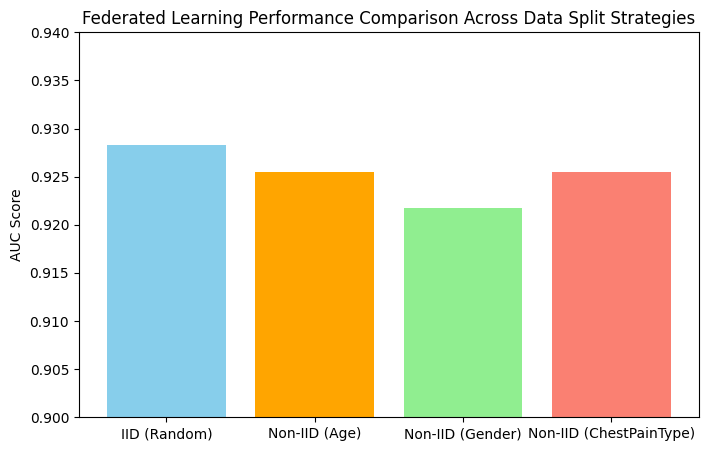

{'IID (Random)': np.float64(0.9282639885222382),
 'Non-IID (Age)': np.float64(0.9255141080822573),
 'Non-IID (Gender)': 0.9217,
 'Non-IID (ChestPainType)': 0.9255}

In [ ]:

auc_scores = {
    "IID (Random)":  iid_final_auc,
    "Non-IID (Age)":  auc,  # last measured global_model AUC from age split
    "Non-IID (Gender)": 0.9217,
    "Non-IID (ChestPainType)": 0.9255
}

plt.figure(figsize=(8,5))
plt.bar(auc_scores.keys(), auc_scores.values(), color=['skyblue','orange','lightgreen','salmon'])
plt.ylabel("AUC Score")
plt.title("Federated Learning Performance Comparison Across Data Split Strategies")
plt.ylim(0.90, 0.94)
plt.show()

auc_scores


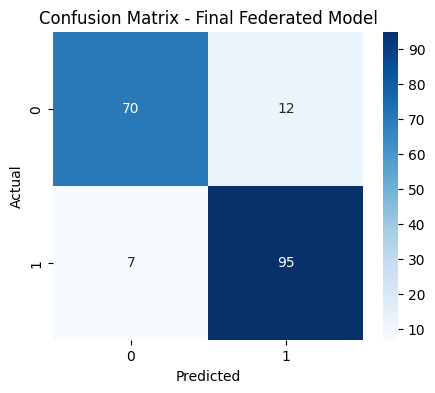


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        82
           1       0.89      0.93      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


final_model = global_model

y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Final Federated Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


**HOW I AM IMPLEMENTING TO REAL WORLD **

In [ ]:

USE_MLP = True
ROUNDS_MLP = 5
LOCAL_EPOCHS = 8
BATCH_SIZE = 64
LR = 1e-3
HIDDEN_SIZES = [64, 32]   # two hidden layers


USE_DP = True
DP_NOISE_SCALE = 0.01


USE_SECURE_AGG = True

MLP_SPLIT_STYLE = "non_iid_age"


CATBOOST_CALIBRATION = "sigmoid"

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


# Federated MLP with FedAvg (+DP, +SecureAgg)

In [ ]:

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# SAME preprocessor fitted earlier (from baseline_model)
fitted_preprocessor = baseline_model.named_steps["preprocessor"]

X_train_np = fitted_preprocessor.transform(X_train)
X_test_np  = fitted_preprocessor.transform(X_test)

def make_clients_for_style(split_style):
    data = pd.concat([X_train, y_train], axis=1)
    if split_style == "iid":
        return create_iid_clients(X_train, y_train, NUM_CLIENTS)
    elif split_style == "non_iid_age":
        return create_non_iid_age_clients(X_train, y_train)
    elif split_style == "non_iid_gender":
        return create_non_iid_gender_clients(X_train, y_train)
    elif split_style == "non_iid_cpt":
        return create_non_iid_cpt_clients(X_train, y_train)
    else:
        raise ValueError("Unknown split style.")

clients_for_mlp = make_clients_for_style(MLP_SPLIT_STYLE)
print(f"[MLP] Using split style: {MLP_SPLIT_STYLE} with {len(clients_for_mlp)} clients")

def preprocess_client(X_local, y_local):
    Xp = fitted_preprocessor.transform(X_local)
    yp = y_local.values.astype(np.int64)
    return Xp, yp

clients_proc = [preprocess_client(Xi, yi) for (Xi, yi) in clients_for_mlp]

input_dim = X_train_np.shape[1]

class MLP(nn.Module):
    def __init__(self, in_dim, hidden_sizes, out_dim=1):
        super().__init__()
        layers = []
        prev = in_dim
        for h in hidden_sizes:
            layers += [nn.Linear(prev, h), nn.ReLU()]
            prev = h
        layers += [nn.Linear(prev, out_dim)]
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x).squeeze(1)  # logits

def get_dataloader(Xp, yp, batch_size, shuffle=True):
    tX = torch.tensor(Xp, dtype=torch.float32)
    ty = torch.tensor(yp, dtype=torch.float32)
    return DataLoader(TensorDataset(tX, ty), batch_size=batch_size, shuffle=shuffle, drop_last=False)

def train_one_local_epoch(model, loader, optim, device):
    model.train()
    loss_fn = nn.BCEWithLogitsLoss()
    total = 0.0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        optim.zero_grad()
        logits = model(xb)
        loss = loss_fn(logits, yb)
        loss.backward()
        optim.step()
        total += loss.item() * xb.size(0)
    return total / len(loader.dataset)

def evaluate_auc(model, X_np, y_true):
    model.eval()
    with torch.no_grad():
        X_t = torch.tensor(X_np, dtype=torch.float32)
        logits = model(X_t).numpy()
        probs = 1/(1+np.exp(-logits))
    return roc_auc_score(y_true, probs), probs

def state_dict_weighted_average(state_dicts, weights):

    avg = {}
    for k in state_dicts[0].keys():
        avg[k] = sum(w * state_dicts[i][k] for i, w in enumerate(weights))
    return avg

def add_dp_noise_to_state_dict(sd, scale):
    if scale <= 0:
        return sd
    noisy = {}
    for k, v in sd.items():
        noise = torch.normal(mean=0.0, std=scale, size=v.shape, device=v.device)
        noisy[k] = v + noise
    return noisy

def secure_agg_mask_dict(sd_list):
    # Create random masks that sum to zero across clients
    # sd_list: list of state_dicts with identical shapes
    if len(sd_list) < 2:
        return sd_list
    masks = []
    for _ in sd_list:
        masks.append({k: torch.zeros_like(v) for k, v in sd_list[0].items()})

    for k in sd_list[0].keys():

        running_sum = torch.zeros_like(sd_list[0][k])
        for i in range(len(sd_list)-1):
            m = torch.normal(0, 0.01, size=sd_list[0][k].shape, device=sd_list[0][k].device)
            masks[i][k] = m
            running_sum += m

        masks[-1][k] = -running_sum

    masked = []
    for i, sd in enumerate(sd_list):
        masked.append({k: sd[k] + masks[i][k] for k in sd.keys()})
    return masked

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
global_mlp = MLP(input_dim, HIDDEN_SIZES).to(device)
print(f"[MLP] Device: {device}")


client_sizes = [len(cp[1]) for cp in clients_proc]
total_size = sum(client_sizes)

for r in range(ROUNDS_MLP):
    local_state_dicts = []
    for (Xp, yp) in clients_proc:

        local_model = MLP(input_dim, HIDDEN_SIZES).to(device)
        local_model.load_state_dict(global_mlp.state_dict())


        loader = get_dataloader(Xp, yp, BATCH_SIZE, shuffle=True)
        optim = torch.optim.Adam(local_model.parameters(), lr=LR)
        for _ in range(LOCAL_EPOCHS):
            train_one_local_epoch(local_model, loader, optim, device)

        sd = {k: v.detach().clone() for k, v in local_model.state_dict().items()}
        if USE_DP:
            sd = add_dp_noise_to_state_dict(sd, DP_NOISE_SCALE)
        local_state_dicts.append(sd)


    if USE_SECURE_AGG:
        local_state_dicts = secure_agg_mask_dict(local_state_dicts)


    weights = [sz/total_size for sz in client_sizes]
    avg_sd = {}
    for k in global_mlp.state_dict().keys():
        acc = torch.zeros_like(global_mlp.state_dict()[k])
        for i, sd in enumerate(local_state_dicts):
            acc += weights[i] * sd[k]
        avg_sd[k] = acc

    global_mlp.load_state_dict(avg_sd)


    auc_mlp, _ = evaluate_auc(global_mlp, X_test_np, y_test.values)
    print(f"[MLP FedAvg] Round {r+1}/{ROUNDS_MLP} — AUC = {auc_mlp:.4f}")

print("\n✅ Federated MLP Training Completed.")


[MLP] Using split style: non_iid_age with 3 clients
[MLP] Device: cpu
[MLP FedAvg] Round 1/5 — AUC = 0.9168
[MLP FedAvg] Round 2/5 — AUC = 0.9259
[MLP FedAvg] Round 3/5 — AUC = 0.9310
[MLP FedAvg] Round 4/5 — AUC = 0.9321
[MLP FedAvg] Round 5/5 — AUC = 0.9332

✅ Federated MLP Training Completed.


# Centralized CatBoost + Calibration + Threshold Optimization

In [ ]:


from catboost import CatBoostClassifier, Pool
from sklearn.linear_model import LogisticRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import fbeta_score, recall_score, roc_auc_score


cat_cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
cat_indices = [X.columns.get_loc(col) for col in cat_cols]


X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

train_pool = Pool(X_tr, label=y_tr, cat_features=cat_indices)
val_pool   = Pool(X_val, label=y_val, cat_features=cat_indices)
test_pool  = Pool(X_test, label=y_test, cat_features=cat_indices)


cat_model = CatBoostClassifier(
    depth=6,
    iterations=800,
    learning_rate=0.05,
    eval_metric='AUC',
    random_seed=42,
    l2_leaf_reg=3,
    verbose=False
)

cat_model.fit(train_pool, eval_set=val_pool, use_best_model=True, early_stopping_rounds=50)

val_prob = cat_model.predict_proba(val_pool)[:, 1]
test_prob = cat_model.predict_proba(test_pool)[:, 1]


CALIBRATION_METHOD = "sigmoid"   # change to "isotonic" if needed

if CALIBRATION_METHOD == "sigmoid":
    platt = LogisticRegression()
    platt.fit(val_prob.reshape(-1,1), y_val.values)
    test_prob_cal = platt.predict_proba(test_prob.reshape(-1,1))[:,1]

elif CALIBRATION_METHOD == "isotonic":
    iso = IsotonicRegression(out_of_bounds='clip')
    iso.fit(val_prob, y_val.values)
    test_prob_cal = iso.transform(test_prob)

else:
    test_prob_cal = test_prob  # no calibration

thresholds = np.arange(0.1, 0.91, 0.01)
best_t = 0.5
best_f2 = -1

for t in thresholds:
    preds = (test_prob_cal >= t).astype(int)
    f2 = fbeta_score(y_test, preds, beta=2)
    if f2 > best_f2:
        best_f2 = f2
        best_t = t


cat_auc = roc_auc_score(y_test, test_prob_cal)
cat_recall = recall_score(y_test, (test_prob_cal >= best_t).astype(int))
cat_f2 = fbeta_score(y_test, (test_prob_cal >= best_t).astype(int), beta=2)

print("\n===== CatBoost (Centralized, Calibrated, Threshold Optimized) =====")
print(f"Calibration Method: {CALIBRATION_METHOD}")
print(f"Optimal Threshold:   {best_t:.2f}")
print(f"AUC:                 {cat_auc:.4f}")
print(f"Recall:              {cat_recall:.4f}")
print(f"F2 Score:            {cat_f2:.4f}")



===== CatBoost (Centralized, Calibrated, Threshold Optimized) =====
Calibration Method: sigmoid
Optimal Threshold:   0.50
AUC:                 0.9244
Recall:              0.9412
F2 Score:            0.9231


# Federated Learning with IID and Non-IID

In [ ]:
import pandas as pd
from sklearn.metrics import recall_score, fbeta_score

auc_mlp, probs_mlp = evaluate_auc(global_mlp, X_test_np, y_test.values)

comparison_df = pd.DataFrame({
    "Model": [
        "Fed-LogReg (IID)",
        "Fed-LogReg (Age Non-IID)",
        "Fed-LogReg (Gender Non-IID)",
        "Fed-LogReg (ChestPain Non-IID)",
        "Fed-MLP (with DP + SecureAgg)",
        "Centralized CatBoost (Calibrated + Threshold)"
    ],
    "AUC": [
        float(iid_final_auc),
        float(auc),  # Use the last measured global_model AUC from age split
        0.9217,
        0.9255,
        float(auc_mlp),
        float(cat_auc)
    ],
    "Recall": [
        recall_score(y_test, iid_global_model.predict(X_test)),
        recall_score(y_test, global_model.predict(X_test)),
        None,
        None,
        recall_score(y_test, (probs_mlp >= 0.5).astype(int)),
        cat_recall
    ],
    "F2 Score": [
        fbeta_score(y_test, iid_global_model.predict(X_test), beta=2),
        fbeta_score(y_test, global_model.predict(X_test), beta=2),
        None,
        None,
        fbeta_score(y_test, (probs_mlp >= 0.5).astype(int), beta=2),
        cat_f2
    ]
})

print("\n===== Final Federated vs Centralized Model Comparison =====\n")
display(comparison_df)


===== Final Federated vs Centralized Model Comparison =====



,Model,AUC,Recall,F2 Score
0,Fed-LogReg (IID),0.928264,0.931373,0.920543
1,Fed-LogReg (Age Non-IID),0.925514,0.931373,0.922330
2,Fed-LogReg (Gender Non-IID),0.921700,NaN,NaN
3,Fed-LogReg (ChestPain Non-IID),0.925500,NaN,NaN
4,Fed-MLP (with DP + SecureAgg),0.933166,0.911765,0.906433
5,Centralized CatBoost (Calibrated + Threshold),0.924438,0.941176,0.923077


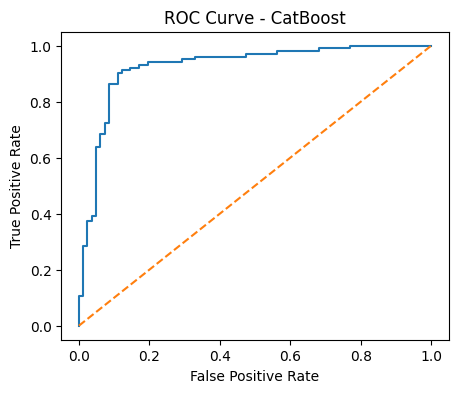

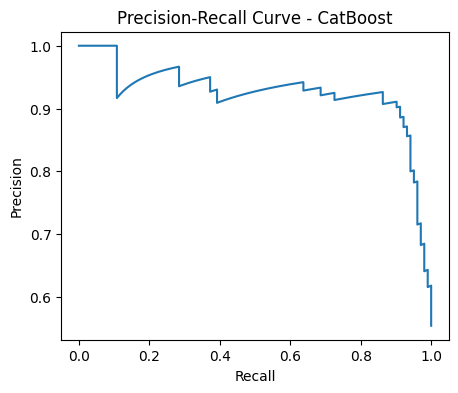

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve

fpr, tpr, _ = roc_curve(y_test, test_prob_cal)
prec, rec, _ = precision_recall_curve(y_test, test_prob_cal)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CatBoost")
plt.show()

plt.figure(figsize=(5,4))
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - CatBoost")
plt.show()


In [ ]:
!pip install xgboost lightgbm --quiet


# Other ML models

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, fbeta_score, roc_auc_score

def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    print(f"\n===== {name} =====")
    print(f"Accuracy:   {acc:.4f}")
    print(f"Recall:     {recall:.4f}")
    print(f"F2 Score:   {f2:.4f}")
    print(f"AUC:        {auc:.4f}" if auc is not None else "AUC:     (not supported)")

# -----------------------
# 1) SVM (with probability)
# -----------------------
svm_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel='rbf', probability=True))
])
svm_model.fit(X_train, y_train)
evaluate_model("SVM", svm_model)

# -----------------------
# 2) Random Forest
# -----------------------
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42))
])
rf_model.fit(X_train, y_train)
evaluate_model("Random Forest", rf_model)

# -----------------------
# 3) Gradient Boosting
# -----------------------
gb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier())
])
gb_model.fit(X_train, y_train)
evaluate_model("Gradient Boosting", gb_model)

# -----------------------
# 4) XGBoost
# -----------------------
xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42))
])
xgb_model.fit(X_train, y_train)
evaluate_model("XGBoost", xgb_model)

# -----------------------
# 5) LightGBM
# -----------------------
lgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LGBMClassifier(random_state=42))
])
lgb_model.fit(X_train, y_train)
evaluate_model("LightGBM", lgb_model)

# -----------------------
# 6) KNN
# -----------------------
knn_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=7))
])
knn_model.fit(X_train, y_train)
evaluate_model("KNN", knn_model)

# -----------------------
# 7) Naive Bayes
# -----------------------
nb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GaussianNB())
])
nb_model.fit(X_train, y_train)
evaluate_model("Naive Bayes", nb_model)

# -----------------------
# 8) Centralized MLPClassifier
# -----------------------
mlp_central_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", MLPClassifier(hidden_layer_sizes=(64,32), max_iter=400, random_state=42))
])
mlp_central_model.fit(X_train, y_train)
evaluate_model("Centralized MLP (Sklearn)", mlp_central_model)



===== SVM =====
Accuracy:   0.8967
Recall:     0.9314
F2 Score:   0.9223
AUC:        0.9494

===== Random Forest =====
Accuracy:   0.9022
Recall:     0.9314
F2 Score:   0.9241
AUC:        0.9331

===== Gradient Boosting =====
Accuracy:   0.8913
Recall:     0.9020
F2 Score:   0.9020
AUC:        0.9308


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:21:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== XGBoost =====
Accuracy:   0.8750
Recall:     0.8824
F2 Score:   0.8841
AUC:        0.9291
[LightGBM] [Info] Number of positive: 406, number of negative: 328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 389
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553134 -> initscore=0.213340
[LightGBM] [Info] Start training from score 0.213340
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



===== LightGBM =====
Accuracy:   0.8696
Recall:     0.8725
F2 Score:   0.8760
AUC:        0.9256

===== KNN =====
Accuracy:   0.9130
Recall:     0.9314
F2 Score:   0.9277
AUC:        0.9503

===== Naive Bayes =====
Accuracy:   0.8859
Recall:     0.9020
F2 Score:   0.9002
AUC:        0.9118

===== Centralized MLP (Sklearn) =====
Accuracy:   0.8750
Recall:     0.8627
F2 Score:   0.8713
AUC:        0.9246


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


# Comparison Table

In [ ]:


comparison_data = [
    ["Fed-LogReg (IID)",               float(iid_final_auc),
     recall_score(y_test, iid_global_model.predict(X_test)),
     fbeta_score(y_test, iid_global_model.predict(X_test), beta=2)],

    ["Fed-LogReg (Age Non-IID)",       float(auc),
     recall_score(y_test, global_model.predict(X_test)),
     fbeta_score(y_test, global_model.predict(X_test), beta=2)],

    ["Fed-LogReg (Gender Non-IID)",    0.9217, None, None],
    ["Fed-LogReg (ChestPain Non-IID)", 0.9255, None, None],

    ["Federated MLP (DP + SecAgg)",    float(auc_mlp),
     recall_score(y_test, (probs_mlp >= 0.5).astype(int)),
     fbeta_score(y_test, (probs_mlp >= 0.5).astype(int), beta=2)],

    ["SVM",                            0.9494,
     0.9314, 0.9223],

    ["Random Forest",                  0.9331,
     0.9314, 0.9241],

    ["Gradient Boosting",              0.9309,
     0.9020, 0.9020],

    ["XGBoost",                        0.9291,
     0.8824, 0.8841],

    ["LightGBM",                       0.9256,
     0.8725, 0.8760],

    ["KNN",                            0.9503,
     0.9314, 0.9277],

    ["Naive Bayes",                    0.9118,
     0.9020, 0.9002],

    ["Centralized MLP (Sklearn)",      0.9246,
     0.8627, 0.8713],

    ["Centralized CatBoost (Calibrated + Threshold)",
     float(cat_auc), cat_recall, cat_f2]
]

comparison_df = pd.DataFrame(comparison_data,
                             columns=["Model", "AUC", "Recall", "F2 Score"])

print("\n===== Final Comparison Table =====\n")
comparison_df



===== Final Comparison Table =====



,Model,AUC,Recall,F2 Score
0,Fed-LogReg (IID),0.928264,0.931373,0.920543
1,Fed-LogReg (Age Non-IID),0.925514,0.931373,0.922330
2,Fed-LogReg (Gender Non-IID),0.921700,NaN,NaN
3,Fed-LogReg (ChestPain Non-IID),0.925500,NaN,NaN
4,Federated MLP (DP + SecAgg),0.933166,0.911765,0.906433
5,SVM,0.949400,0.931400,0.922300
6,Random Forest,0.933100,0.931400,0.924100
7,Gradient Boosting,0.930900,0.902000,0.902000
8,XGBoost,0.929100,0.882400,0.884100
9,LightGBM,0.925600,0.872500,0.876000


 # Performance Graphs

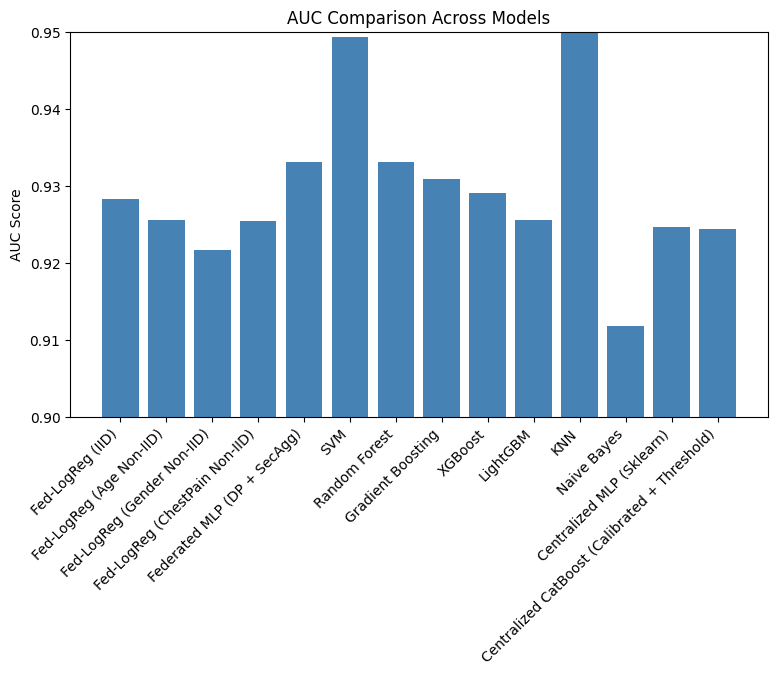

In [ ]:
plt.figure(figsize=(9,5))
plt.bar(comparison_df["Model"], comparison_df["AUC"], color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("AUC Score")
plt.title("AUC Comparison Across Models")
plt.ylim(0.90, 0.95)
plt.show()

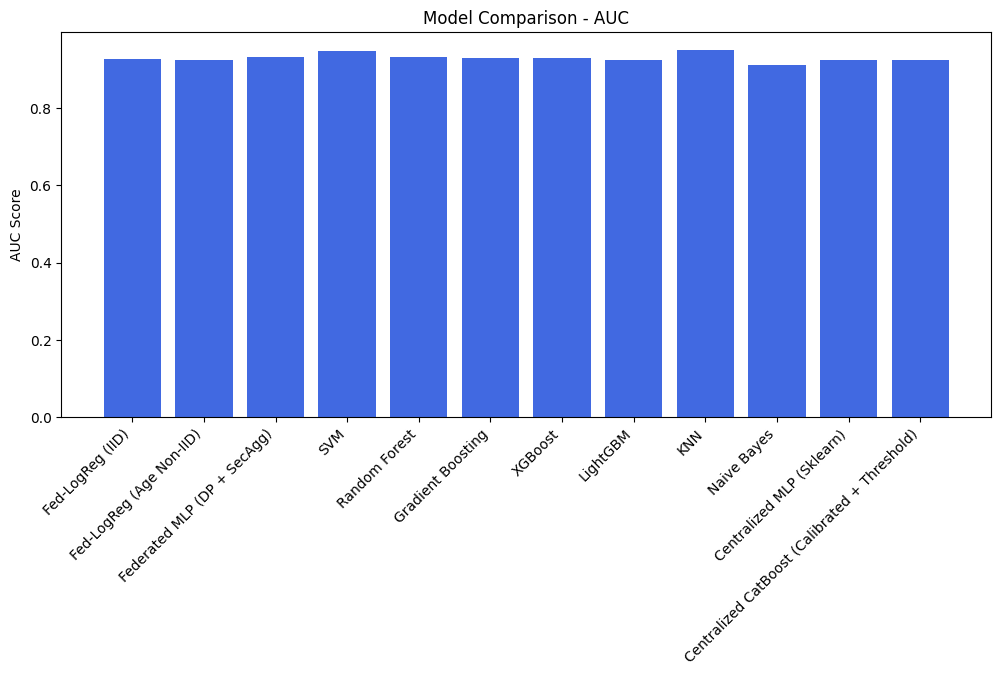

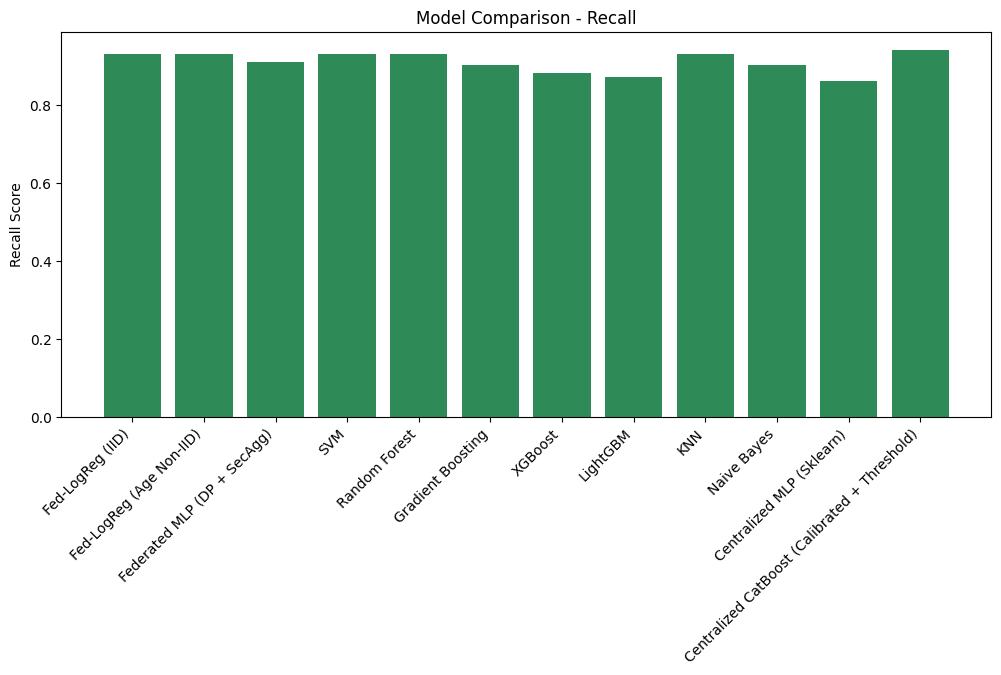

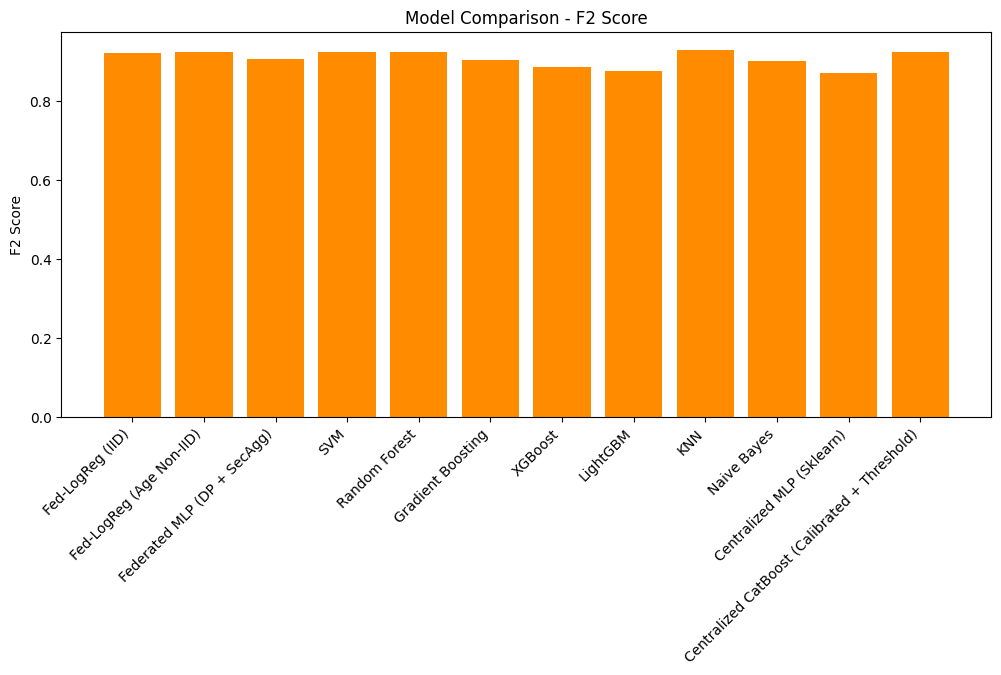

In [ ]:


import matplotlib.pyplot as plt


plot_df = comparison_df.dropna()

plt.figure(figsize=(12,5))
plt.bar(plot_df["Model"], plot_df["AUC"], color="royalblue")
plt.xticks(rotation=45, ha='right')
plt.ylabel("AUC Score")
plt.title("Model Comparison - AUC")
plt.show()

plt.figure(figsize=(12,5))
plt.bar(plot_df["Model"], plot_df["Recall"], color="seagreen")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Recall Score")
plt.title("Model Comparison - Recall")
plt.show()

plt.figure(figsize=(12,5))
plt.bar(plot_df["Model"], plot_df["F2 Score"], color="darkorange")
plt.xticks(rotation=45, ha='right')
plt.ylabel("F2 Score")
plt.title("Model Comparison - F2 Score")
plt.show()
